<hr/>

# Data Mining  [EN.550.636.02]

04/13/2018

**TA** - Cong Mu (cmu2@jhu.edu)   <br/>
**Office Hour** - Monday 9:00am ~ 11:00am

- **Classification**: Nearest Neighbor, Naive Bayes, LDA, QDA, Decision Tree, Random Forest
- **Clustering**: K-Means, Gaussian Mixture Model, Spectral Clustering
- **Q & A**

<hr/>


[Install Python](https://www.python.org/) <br/>
[Install Anaconda](https://www.continuum.io/downloads)

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

<h2><font color="darkblue">Classification</font></h2>
<hr/>

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

### Nearest Neighbor

- Data
> $ X = (x_{ij})_{n \times m} $

- For each data point with unknown label 
> Calculate its distance with data points with known label
>
> Find the $ k $ nearest neighbor ($ k $ minimal distance)

- Classify the unknown data point based on the label of the $ k $ nearest neighbor (vote)
> Uniform: All points in each neighborhood are weighted equally
>
> Distance: Weight points by the inverse of their distance
>
> Self-defined

- Example

In [5]:
# Toy Example
knn = pd.DataFrame()

for k in range(1,11):
    
    model1 = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2)   # p: which Minkowski p-norm to use
    model2 = KNeighborsClassifier(n_neighbors=k, weights='distance', p=2) 
    
    cvscores1 = cross_val_score(model1, X, y, cv=10)
    cvscores2 = cross_val_score(model2, X, y, cv=10)
    
    # Save the result
    knn = knn.append(pd.DataFrame(data=[[k, 'uniform', cvscores1.mean()]], columns=['k','weights', '10-fold CV score']))
    knn = knn.append(pd.DataFrame(data=[[k, 'distance', cvscores2.mean()]], columns=['k','weights', '10-fold CV score']))

knn.index = arange(1,21)

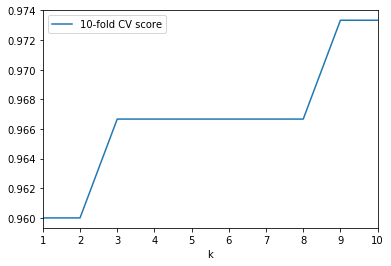

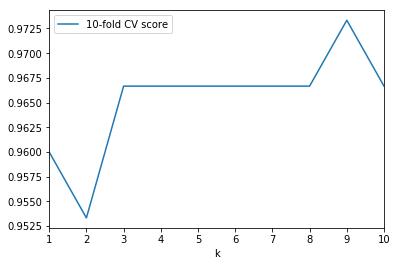

In [6]:
knn.groupby('weights').plot(x='k');

<br/>
- **Note:** For `KNeighborsClassifier` in scikit-learn, `weights` could be
> ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally
>
> ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away
>
> 'callable' : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

### Naive Bayes

- Fit
> Estimate the parameters in each class

- Predict
> For each unlabeled data, calculate the posterior for each class
>
> Classify the data with class k having the largest posterior

- Assumption
> Features are independent

- Example

In [7]:
# Specify the model
clf = GaussianNB(priors=None)

# Fit
clf.fit(iris.data, iris.target)

# Predict
pred = clf.predict(iris.data)

print('Classifier: GNB')
print('Number of mislabeled points out of a total %d points : %d' % (iris.target.size, (iris.target!=pred).sum()))
print('Accuracy: ', mean(iris.target==pred))

Classifier: GNB
Number of mislabeled points out of a total 150 points : 6
Accuracy:  0.96


### Linear Discriminant Analysis & Quadratic Discriminant Analysis

- Fit
> Estimate the parameters in each class

- Predict
> For each unlabeled data, calculate the log-likelihood for each class
>
> Classify the data with class k having the largest log-likelihood

- Difference
> LDA: same covariance matrix in different classes
>
> QDA: different covariance matrix in different classes

- Example

In [8]:
# Specify the model
clf = LinearDiscriminantAnalysis(priors=None)

# Fit
clf.fit(iris.data, iris.target)

# Predict
pred = clf.predict(iris.data)

print('Classifier: LDA')
print('Number of mislabeled points out of a total %d points : %d' % (iris.target.size, (iris.target!=pred).sum()))
print('Accuracy: ', mean(iris.target==pred))

Classifier: LDA
Number of mislabeled points out of a total 150 points : 3
Accuracy:  0.98


In [9]:
# Specify the model
clf = QuadraticDiscriminantAnalysis(priors=None)

# Fit
clf.fit(iris.data, iris.target)

# Predict
pred = clf.predict(iris.data)

print('Classifier: QDA')
print('Number of mislabeled points out of a total %d points : %d' % (iris.target.size, (iris.target!=pred).sum()))
print('Accuracy: ', mean(iris.target==pred))

Classifier: QDA
Number of mislabeled points out of a total 150 points : 3
Accuracy:  0.98


### Decision Tree

- Intuition
> Look for the best split for the data

- Classification criteria
> At a given node with dataset $D$ we want to find the best split $ \quad \theta = (\text{feature} \  j, \text{threshold} \  t) \quad $ to minimize impurity
> 
> $ \displaystyle I(\theta) = \frac{n_{\text{left}}}{n}\, H \left(D_{\text{left}}(\theta) \right) + \frac{n_{\text{right}}}{n}\, H \left(D_{\text{right}}(\theta) \right) $

- Example

In [10]:
# 4 features in total
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
# 3 class each with 50 observation
np.unique(iris.target, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [12]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=4)
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best')

In [13]:
clf.tree_.impurity

array([ 0.66666667,  0.        ,  0.5       ,  0.16803841,  0.04079861,
        0.        ,  0.        ,  0.44444444,  0.        ,  0.44444444,
        0.        ,  0.        ,  0.04253308,  0.44444444,  0.        ,
        0.        ,  0.        ])

In [14]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
# -2 means leaf
clf.tree_.feature

array([ 2, -2,  3,  2,  3, -2, -2,  3, -2,  0, -2, -2,  2,  1, -2, -2, -2])

In [16]:
# -2 means leaf
clf.tree_.threshold

array([ 2.45000005, -2.        ,  1.75      ,  4.94999981,  1.6500001 ,
       -2.        , -2.        ,  1.54999995, -2.        ,  6.94999981,
       -2.        , -2.        ,  4.85000038,  3.0999999 , -2.        ,
       -2.        , -2.        ])

<img src="http://scikit-learn.org/stable/_images/iris.svg" width=600 align=center \>
<p style="text-align:right">(Picture from http://scikit-learn.org/stable/modules/tree.html)</p>

In [17]:
# The higher, the more important the feature is
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature
# It is also known as the Gini importance
clf.feature_importances_

array([ 0.01333333,  0.01333333,  0.55072262,  0.42261071])

- **Note:** For `DecisionTreeClassifier` in scikit-learn
> The default values for the parameters controlling the size of the trees (e.g. `max_depth`, `min_samples_leaf`, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.
>
> The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and `max_features=n_features`, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, `random_state` has to be fixed.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### Random Forest

- Intuition 
> Build multiple randomized trees and combine the result

In [18]:
clf = RandomForestClassifier(n_estimators=10, bootstrap=True, criterion='gini', max_depth=None, random_state=2018)
clf.fit(iris.data, iris.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [19]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [20]:
clf.feature_importances_

array([ 0.05744432,  0.02029045,  0.54059988,  0.38166536])

- Number of Tree

In [47]:
# Save the result
result = pd.DataFrame()

# Try different number of tree
for n in range(10, 110, 10):
    start = datetime.datetime.now()
    clf = RandomForestClassifier(n_estimators=n, random_state=n)
    clf.fit(iris.data, iris.target);
    time = datetime.datetime.now() - start
    cvscore = cross_val_score(clf, iris.data, iris.target, cv=10).mean()
    result = result.append(pd.DataFrame(data=[[n, cvscore, time]], columns=['Trees', 'Scores', 'Time']))

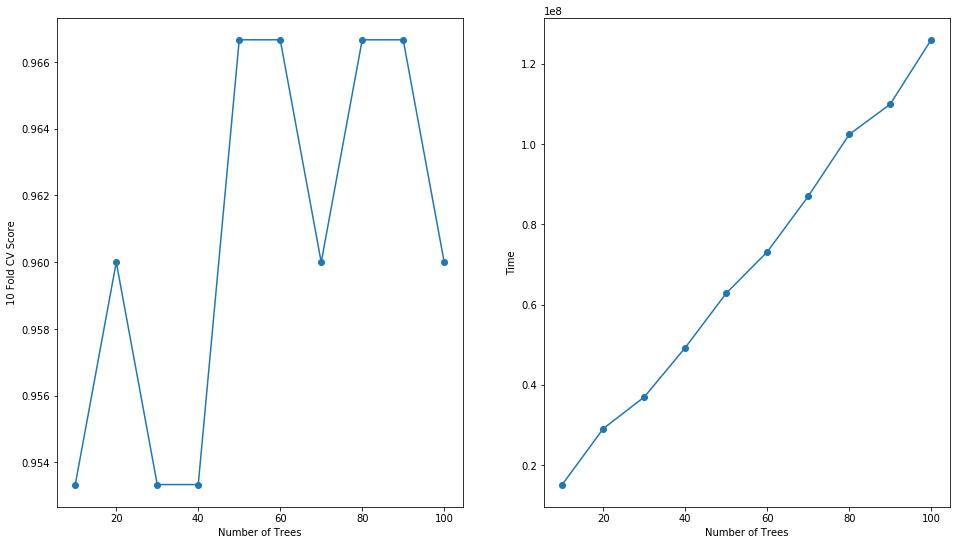

In [48]:
figure(figsize=(16, 9));
subplot(121);
plot(result.Trees, result.Scores, 'o-');
xlabel('Number of Trees');
ylabel('10 Fold CV Score');
subplot(122);
plot(result.Trees, result.Time, 'o-');
xlabel('Number of Trees');
ylabel('Time');

- **Note:** For `RandomForestClassifier` in scikit-learn
> The default values for the parameters controlling the size of the trees (e.g. `max_depth`, `min_samples_leaf`, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.
>
> The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and `max_features=n_features` and `bootstrap=False`, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, `random_state` has to be fixed.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

<h2><font color="darkblue">Clustering</font></h2>
<hr/>

In [23]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

### K-Means

- Intuition
> Minimize the sum of squares (distance between each point and centroid) within each cluster

- Mathematically
> Data $ \displaystyle \  X = (x_{ij})_{n \times d} \  $, try to cluster $ \displaystyle \  n \  $ observations into $ \displaystyle \  k (\le n) \  $ sets $ \displaystyle \  S = \{S_1, S_2, \cdots, S_k\} \  $ to minimize the within-cluster sum of squares
> 
> $ \displaystyle \arg\min_{S} \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_i} \lvert\lvert \mathbf{x} - \mathbf{\mu}_i \rvert\rvert^2 $

- Procedure
> 0. Choose $ k $ initial centroids
> 0. Cluster each data point to its nearest centroid
> 0. Repeat until the centroids do not move significantly

- Example

In [24]:
digits = datasets.load_digits()
data = scale(digits.data)

In [25]:
n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

print(' Number of digits: %d \n Number of samples: %d \n Number of features: %d' % (n_digits, n_samples, n_features))

 Number of digits: 10 
 Number of samples: 1797 
 Number of features: 64


In [26]:
# Cluster
kmeans = KMeans(n_clusters=n_digits, random_state=2018)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2018, tol=0.0001, verbose=0)

In [27]:
# Sum of squared distances of samples to their closest cluster center
kmeans.inertia_

69465.354960396595

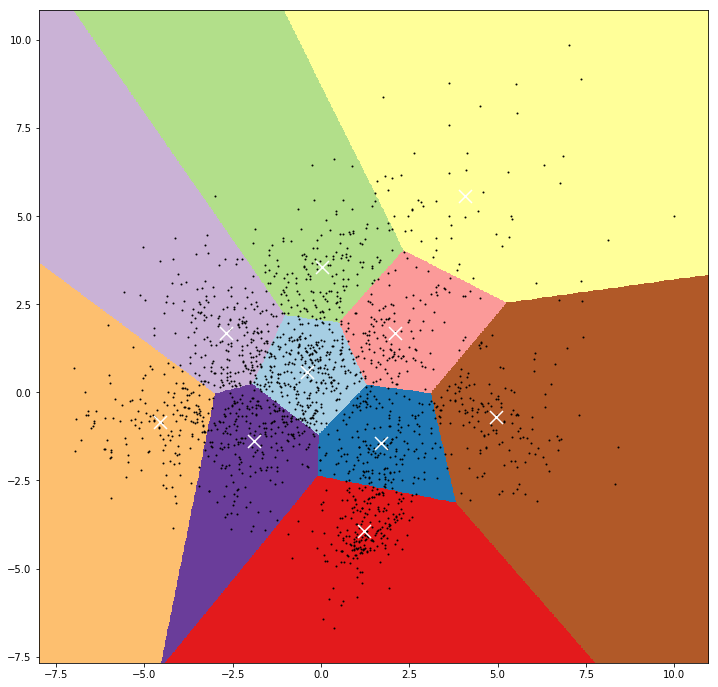

In [28]:
# Visualize the results on PCA-reduced data
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(n_clusters=n_digits, random_state=2018)
kmeans.fit(reduced_data);

# Step size of the mesh
h = 0.02     

# Plot the decision boundary
x_min, x_max = reduced_data[:,0].min() - 1, reduced_data[:,0].max() + 1
y_min, y_max = reduced_data[:,1].min() - 1, reduced_data[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain clusters for each point in mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Obtain the centroids of each cluster
centroids = kmeans.cluster_centers_

# Put the result into a color plot
Z = Z.reshape(xx.shape)

figure(figsize=(12, 12))
imshow(Z, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap=plt.cm.Paired, aspect='auto', origin='lower');
plot(reduced_data[:,0], reduced_data[:,1], 'k.', markersize=2);
scatter(centroids[:,0], centroids[:,1], marker='x', s=169, linewidths=3, color='w', zorder=10);

<br/>
- **Note:** For `KMeans` in scikit-learn
> Given enough time, K-means will always converge, however this may be to a local minimum. This is highly dependent on the initialization of the centroids. As a result, the computation is often done several times, with different initializations of the centroids. One method to help address this issue is the `k-means++` initialization scheme, which has been implemented in scikit-learn (use the `init='k-means++'` parameter). This initializes the centroids to be (generally) distant from each other, leading to provably better results than random initialization.

[References](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Gaussian Mixture Model

- Intuition
> Infer the parameters of $ k $ components

- Mathematically
> Maximize likelihood function (e.g. $ k = 2 $)
> 
> $ \displaystyle L(\mathbf{x}; \mathbf{\theta}) = \prod_{i=1}^n \Big[ \kappa_i\, f \left(x_i;\mu_1,\Sigma_1 \right) + (1-\kappa_i)\, f \left(x_i; \mu_2,\Sigma_2 \right) \Big] \quad $ where $ \displaystyle \quad \kappa_i = \mathbb{P}[x_i \  \in \  \text{component}_1] $

- Expectation-Maximization Algorithm
> 0. Start with initial model $ \theta $
> 0. Update $ \theta = \theta_{new} \  $ if $ \ L(\mathbf{x}; \mathbf{\theta_{new}}) > L(\mathbf{x}; \mathbf{\theta}) $
> 0. Repeat until convergence

- Procedure
> E-step: Calculate $ \  \mathbf{\kappa} \ $ based on the current model $ \theta \  $ and data $ \ \mathbf{x} $
> 
> M-step: Maximize the likelihood function based on the estimated $ \  \mathbf{\kappa} \ $

- Example

In [29]:
# Generate data
n_samples = 1500
random_state = 2018
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)

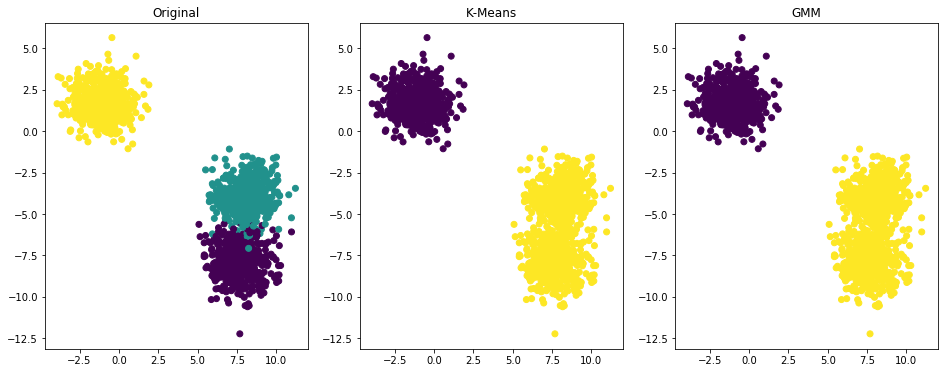

In [30]:
# Incorrect number of clusters
c11 = KMeans(n_clusters=2, random_state=2018).fit_predict(X)
c12 = GaussianMixture(n_components=2, covariance_type='full', random_state=2018).fit(X).predict(X)

figure(figsize=(16, 6))
subplot(131);
title('Original');
scatter(X[:,0], X[:,1], c=y);
subplot(132);
title('K-Means');
scatter(X[:,0], X[:,1], c=c11);
subplot(133);
title('GMM');
scatter(X[:,0], X[:,1], c=c12);

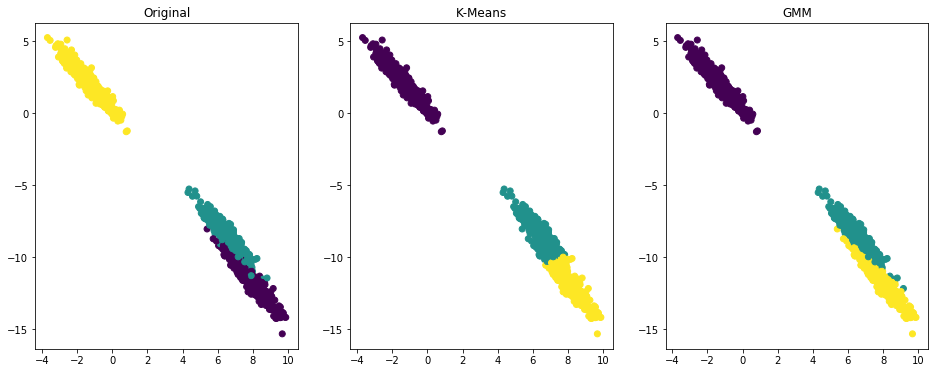

In [31]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X2 = np.dot(X, transformation)
c21 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X2)
# All components share the same general covariance matrix
c22 = GaussianMixture(n_components=3, covariance_type='tied', random_state=2018).fit(X2).predict(X2)

figure(figsize=(16, 6))
subplot(131);
title('Original');
scatter(X2[:,0], X2[:,1], c=y);
subplot(132);
title('K-Means');
scatter(X2[:,0], X2[:,1], c=c21);
subplot(133);
title('GMM');
scatter(X2[:,0], X2[:,1], c=c22);

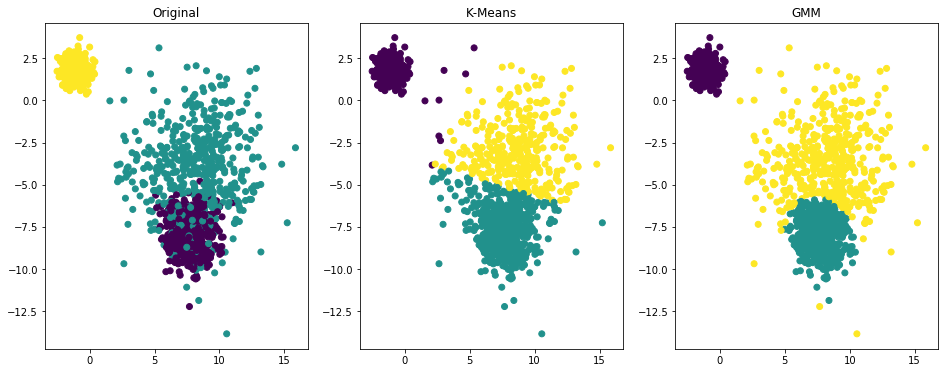

In [32]:
# Different variance
X3, y3 = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)
c31 = KMeans(n_clusters=3, random_state=random_state).fit_predict(X3)
# Each component has its own diagonal covariance matrix
c32 = GaussianMixture(n_components=3, covariance_type='full', random_state=2018).fit(X3).predict(X3)

figure(figsize=(16, 6))
subplot(131);
title('Original');
scatter(X3[:,0], X3[:,1], c=y3);
subplot(132);
title('K-Means');
scatter(X3[:,0], X3[:,1], c=c31);
subplot(133);
title('GMM');
scatter(X3[:,0], X3[:,1], c=c32);

<br/>
- **Note:** For `GaussianMixture` in scikit-learn, `covariance_type` could be
> 'full' (each component has its own general covariance matrix)
>
> 'tied' (all components share the same general covariance matrix)
>
> 'diag' (each component has its own diagonal covariance matrix)
>
> 'spherical' (each component has its own single variance)

[References](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)

### Spectral Clustering

- Data
> $ X = (x_{ij})_{n \times d} $

- Compute the similarity matrix of $ X $
> For example, Gaussian similarity function
>
> $ \displaystyle s(\mathbf{x_i}, \mathbf{x_j}) = e^{- \frac{\lvert\lvert \mathbf{x_i} - \mathbf{x_j} \rvert\rvert^2}{2 \sigma^2}} $

- Compute the Laplacian matrix $ L $ and the SVD of $ L $
> $ L = D − W $
> 
> $ W = (w_{ij})_{n \times n} \quad $ is weight matrix
> 
> $ D = \text{diag}(d_{ii}) \quad $ where $ \quad \displaystyle d_{ii} = \sum_j w_{ij}$

- Choose the first $ k $ singular vectors and use them to form a new matrix
> $ X_k = (\widetilde{x}_{ij})_{n \times k} $

- Use K-means/GMM to cluster $ X_k $

- Example

In [33]:
n_samples = 1500
random_state = 2018
X, y = datasets.make_circles(n_samples=n_samples, factor=0.4, noise=0.05, random_state=random_state)

In [34]:
# K-Means
c1 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

In [35]:
# GMM
c2 = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state).fit(X).predict(X)

In [36]:
# Spectral Clustering
c3 = SpectralClustering(n_clusters=2, gamma=100).fit_predict(X)

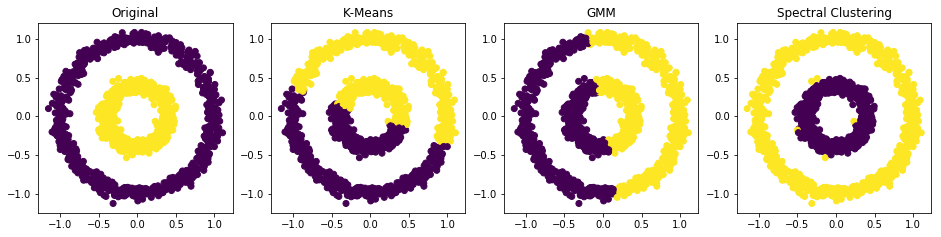

In [37]:
figure(figsize=(16, 6))
subplot(141, aspect='equal');
title('Original');
scatter(X[:,0], X[:,1], c=y);
subplot(142, aspect='equal');
title('K-Means');
scatter(X[:,0], X[:,1], c=c1);
subplot(143, aspect='equal');
title('GMM');
scatter(X[:,0], X[:,1], c=c2);
subplot(144, aspect='equal');
title('Spectral Clustering');
scatter(X[:,0], X[:,1], c=c3);

In [38]:
X2, y2 = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=random_state)

In [39]:
# K-Means
c21 = KMeans(n_clusters=2, random_state=random_state).fit_predict(X2)

In [40]:
# GMM
c22 = GaussianMixture(n_components=2, covariance_type='full', random_state=random_state).fit(X2).predict(X2)

In [41]:
# Spectral Clustering
c23 = SpectralClustering(n_clusters=2, gamma=100).fit_predict(X2)

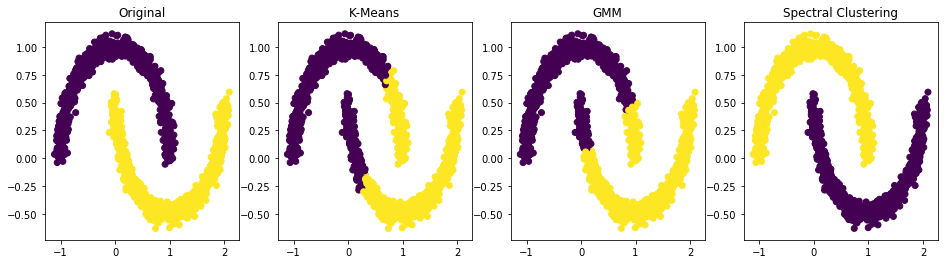

In [42]:
figure(figsize=(16, 4))
subplot(141);
title('Original');
scatter(X2[:,0], X2[:,1], c=y2);
subplot(142);
title('K-Means');
scatter(X2[:,0], X2[:,1], c=c21);
subplot(143);
title('GMM');
scatter(X2[:,0], X2[:,1], c=c22);
subplot(144);
title('Spectral Clustering');
scatter(X2[:,0], X2[:,1], c=c23);

<br/>
- **Note:** For `SpectralClustering` in scikit-learn
> When calling `fit`, an affinity matrix is constructed using either kernel function such the Gaussian (aka RBF) kernel of the euclidean distanced `d(X,X)`: `np.exp(-gamma * d(X,X) ** 2)`

[References](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)

<h2><font color="darkblue">scikit-learn</font></h2>
<hr/>

<img src="https://pbs.twimg.com/media/DVr7QTeUQAEQtJL.jpg" width=800 align=center \>

<img src="http://scikit-learn.org/stable/_static/ml_map.png" width=800 align=center \>

[Reference](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)